In [81]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import matplotlib.pyplot as plt
import numpy as np 

from experiment_helpers import * 
from src.solvers import *
from src.syntetic import *


In [82]:

def plot_accuracy_results(results):
    plt.figure(figsize=(6, 8))
    plt.title('Accuracy comparison of standard and hyper graphs')
    plt.ylabel('Accuracy')
    plt.xlabel('Test Size')
  
    independent = [experiment['test_size'] for experiment in results]
    graph_accuracy = [experiment['graph_accuracy'] for experiment in results]
    hyper_graph_accuracy = [experiment['hyper_graph_accuracy'] for experiment in results]

    plt.plot(independent, graph_accuracy, label='standard_graph_accuracy')
    plt.plot(independent, hyper_graph_accuracy, label='hyper-graph_accuracy')

    plt.legend()
    plt.show()


def run_experiments(N,M,K1,K2):

    all_results = []

    pi_values, data = generate_model_instance(N, M, K1, K2)

    for test_size in np.arange(0, 1.1, 0.1):
       
        # take a percentile of total interactions
        training_subsize = int(len(data) * test_size)
        interactions = random.sample(data, training_subsize)

        # Create hypergraph
        bond_matrix = create_hypergraph_from_data(interactions)

        # Standard graph
        bin_data = binarize_data(interactions)
        bin_bond_matrix = create_hypergraph_from_data(bin_data)

        # predict ranks based on subset of games
        predicted_hyper_graph_scores , _ = synch_solve_equations(bond_matrix, 500, pi_values, 'newman', sens=1e-6)
        predicted_graph_scores, _= synch_solve_equations(bin_bond_matrix, 500, pi_values, 'newman', sens=1e-6)

        # Measure accuracy for hypergraph and standard graph
        hyper_graph_accuracy = rms(predicted_hyper_graph_scores.values(), pi_values.values())
        graph_accuracy = rms(predicted_graph_scores.values(), pi_values.values())


        all_results.append({
            'test_size': test_size,
            'graph_accuracy': graph_accuracy,
            'hyper_graph_accuracy': hyper_graph_accuracy
        })

    plot_accuracy_results(all_results)
   

Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman
Method  newman


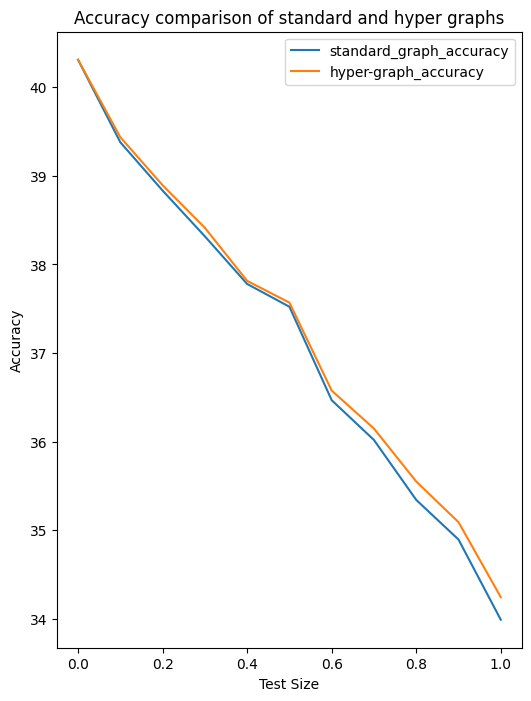

In [83]:


run_experiments(500,200,2,4)